# NEURAL NETWORK FOR HANDWRITTEN DIGIT CLASSIFICATION

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Daṭaset 
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 16s 1us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[2] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

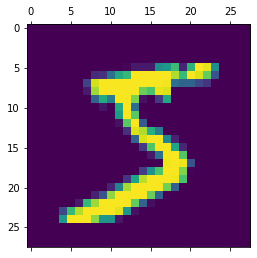

In [8]:
plt.matshow(X_train[0])

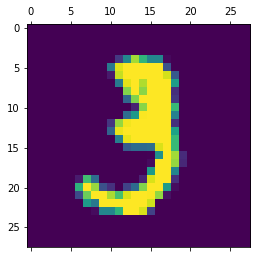

In [9]:
plt.matshow(X_train[10])

In [10]:
y_train[10]

3

In [11]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train=X_train/256         #scaling the input data
X_test=X_test/256

In [23]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [24]:
X_train_flattened.shape    #flattening the input image

(60000, 784)

In [25]:
X_train_flattened[0].shape

(784,)

In [26]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
#Model Building
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4714 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9258


In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2664 - accuracy: 0.9258


[0.26642605662345886, 0.9258000254631042]

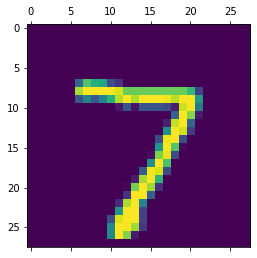

In [29]:
plt.matshow(X_test[0])

In [33]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 928us/step


array([1.7988464e-02, 6.1414465e-07, 6.2115721e-02, 9.3806165e-01,
       1.8380475e-03, 8.4325522e-02, 1.1283526e-06, 9.9977165e-01,
       9.7757027e-02, 6.9107962e-01], dtype=float32)

In [34]:
np.argmax(y_predicted[0])

7

In [38]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [40]:
con_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(123.0, 0.5, 'Truth')

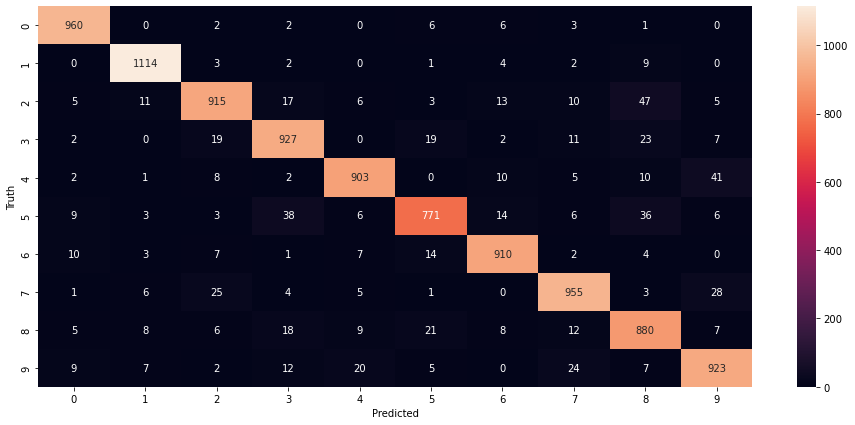

In [43]:
import seaborn as sns
plt.figure(figsize=(16,7))
sns.heatmap(con_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

THANK YOU!